In [1]:
class CPS(object):    
    def __init__(self, sigma, theta):
        
        import numpy as np
        from itertools import permutations
        from math import factorial
        from scipy.stats import spearmanr, kendalltau


        self.sigma = sigma
        self.theta = theta 
        self.n = len(sigma)
        # figure out better way to store this 
        self.p = np.array(list(permutations(sigma)))
        self.idx_dict = {}


    def compute_probabilities(self, distance_metric):
        distance_metrics = {1: spearmanr, 2: kendalltau}
        self.d = distance_metrics[distance_metric]
        prob_dict = {}
        for i, perm in enumerate(self.p):
            self.idx_dict[i] = perm
            prob_dict[i] = self.__cps_prob(np.array(perm))
        # overwrite to be dictionary
        self.p = prob_dict

    def __cps_prob(self, perm):
        num = lambda k, j: np.exp(self.theta * self.__dhat(self.__snk(perm, k, j)))
        denom = lambda k: sum([num(k, j) for j in xrange(k, self.n)])
        return np.prod([num(k, k) / denom(k) for k in xrange(self.n)])


    def __snk(self, perm, k, j):
        # todo: make this more efficient 
        lst = []
        for arr in self.p: 
            if np.array_equal(arr[:k], perm[:k]) & (arr[j] == perm[j]): 
                lst.append(arr)
        return lst
                
    def __dhat(self, snk):
        # make this not a list comprehension :( 
        return sum([self.d(x, np.array(self.sigma)).correlation for x in snk]) / float(len(snk))
    
    def run_tests(): 
        # assert some stuff
        return 

In [2]:
import numpy as np
from mallows_model import mallowsfunctions as mf

In [3]:
with open('sushi3a.5000.10.order.txt', 'r') as f: 
    lst = []
    for line in f.readlines()[1:]: 
        lst.append([int(x) for x in (line[5:]).split(' ')])
    final = np.array(lst)

In [4]:
from collections import Counter

In [41]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
plt.hist?

In [93]:
plt.hist?

In [94]:
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(, ('Shrimp', 'Eel', 'Tuna-1', 'Squid', 'Urchin', 'Salmon', 'Egg', 'Tuna-2', 'Tuna-3', 'Cucumber'), **kwargs)
    plt.xlim(bins[0], bins[-1])

In [102]:
def plot(data): 
    plt.hist(data, align='mid', alpha = .8, edgecolor='black')
    bins = np.arange(11)
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), ('Shrimp', 'Eel', 'Tuna-1', 'Squid', 'Urchin', 'Salmon', 'Egg', 'Tuna-2', 'Tuna-3', 'Cucumber'), rotation=80)
    plt.xlabel('Sushi Type')
    sns.despine()
    plt.show

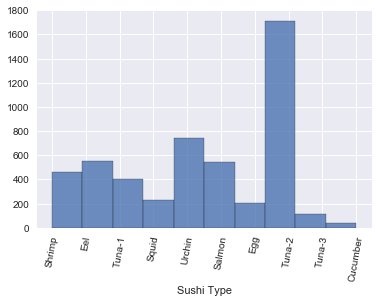

In [103]:
plot(final[:,0])

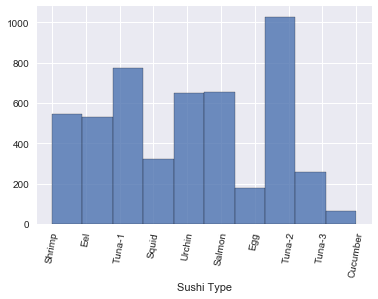

In [104]:
plot(final[:,1])

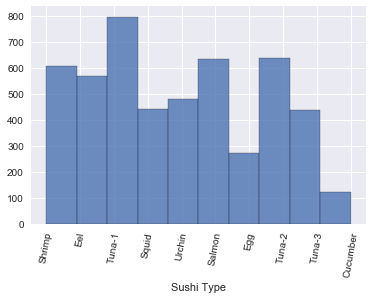

In [105]:
plot(final[:,2])

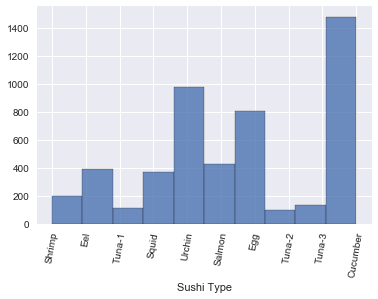

In [106]:
plot(final[:, -1])

In [ ]:
def read_sushi(sushif): 
    '''
        reads the sushi file dataset and returns numpy array of rankings 
    '''
    with open(sushif, 'r') as f: 
        # skip the 
        f.next()
        for line 
    